In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
np.array([3,3**2]).shape

(2,)

In [2]:
%run dataset.py

Files already downloaded and verified
Files already downloaded and verified


In [18]:
all_data = train_dataset.data # np shape (50000, 32, 32, 3)
all_labels = np.array(train_dataset.targets)

In [19]:
user_dataidxs = [np.array(i).astype(int) for i in user_groups.values()]

In [27]:
useridx = []
for i in user_groups.keys():
    useridx += list(user_groups[i])
len(set(useridx))

50000

In [20]:
user_labels = [all_labels[subset] for subset in user_dataidxs]

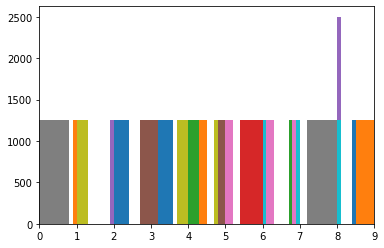

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
for label in user_labels:
    plt.hist(label)
plt.xlim([0,9])
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from copy import deepcopy

__all__ = ['CifarNet']

class CifarNet(nn.Module):
    '''
    From https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py
    '''
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = CifarNet()
sd = net.state_dict()
sd['conv1.weight.var'] = deepcopy(sd['conv1.weight'])

net.load_state_dict(sd)

<All keys matched successfully>

In [29]:
sd['conv1.weight'].sum()

tensor(-1.4424)

In [18]:
id(net.conv1.weight)

47177682893344

In [28]:
for key, value in net.named_parameters():
    print(key)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [7]:
import numpy as np

In [35]:
np.array([4,5,2,6,-9.]).mean()

1.6

In [11]:
np.var(np.array([4,5,2,6,9])+2.8)

5.360000000000001

In [40]:
a = torch.tensor([1,2,3,4])

In [42]:
b = a.numpy()
c = deepcopy(a.numpy())

In [43]:
a[0]=10

In [44]:
b

array([10,  2,  3,  4])

# -------------------------------------

In [1]:
import pickle
import numpy as np

In [2]:
def loadp(filedir):
    return pickle.load( open( filedir, "rb" ) )

In [10]:
received_model = loadp('test_save/received_models.p')
saved_state_dict = loadp('test_save/saved_state_dict.p')

all_models = []
for i in [0,17,24,26,27,34,37,43,6,8]:
    all_models.append(loadp('test_save/'+str(i)+'.p'))

In [11]:
for idx, model in enumerate(all_models):
    for rec_idx, rec_model in enumerate(received_model):
        if np.all(model['conv1.weight'] == rec_model['conv1.weight']):
            print(idx, rec_idx)
            for key in model.keys():
                assert np.all(model[key] == rec_model[key])

0 0
1 3
2 8
3 4
4 9
5 1
6 6
7 5
8 7
9 2


In [12]:
all_conv1 = [model['conv1.weight'] for model in received_model]

In [13]:
mean_conv1 = np.mean(all_conv1, axis=0)
var_conv1 = np.var(all_conv1, axis=0)

(array([15., 24., 55., 76., 89., 93., 62., 25.,  6.,  5.]),
 array([-0.36732408, -0.28506637, -0.20280862, -0.12055089, -0.03829316,
         0.04396456,  0.1262223 ,  0.20848003,  0.29073775,  0.3729955 ,
         0.4552532 ], dtype=float32),
 <a list of 10 Patch objects>)

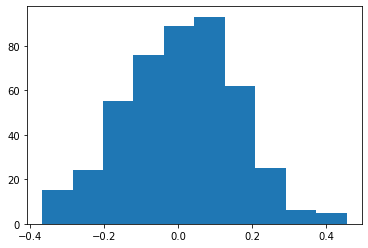

In [14]:
plt.hist(mean_conv1.ravel())

(array([125., 111.,  73.,  55.,  26.,  30.,  14.,   9.,   5.,   2.]),
 array([0.00060546, 0.02900276, 0.05740007, 0.08579737, 0.11419468,
        0.14259198, 0.17098929, 0.19938658, 0.22778389, 0.2561812 ,
        0.2845785 ], dtype=float32),
 <a list of 10 Patch objects>)

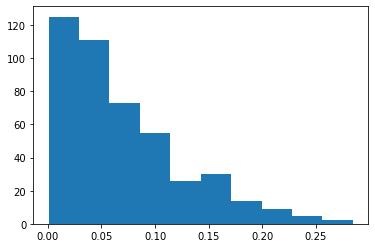

In [15]:
plt.hist(abs(mean_conv1-all_conv1[0]).ravel())

(array([163., 146.,  82.,  35.,  14.,   4.,   2.,   2.,   0.,   2.]),
 array([0.00093652, 0.00497024, 0.00900397, 0.01303769, 0.01707141,
        0.02110514, 0.02513886, 0.02917258, 0.03320631, 0.03724003,
        0.04127375], dtype=float32),
 <a list of 10 Patch objects>)

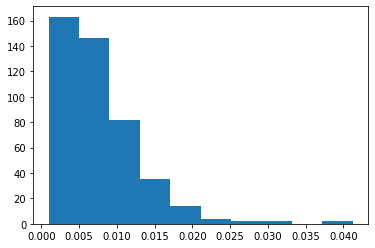

In [16]:
plt.hist(var_conv1.ravel())

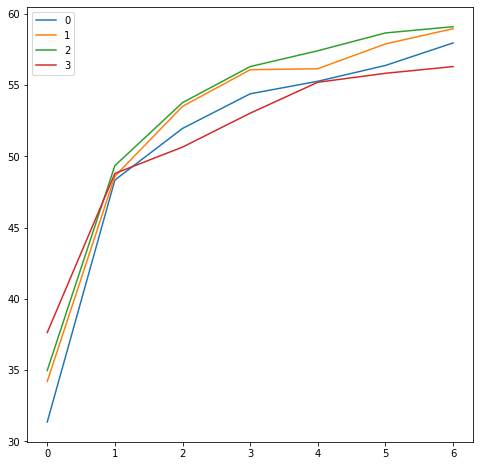

In [5]:
a = [31.36, 48.34, 51.96, 54.39, 55.27, 56.38, 57.96]
b = [34.21, 48.61, 53.51, 56.08, 56.15, 57.89, 58.96]
c = [34.98, 49.35, 53.77, 56.30, 57.41, 58.66, 59.10]
d = [37.64, 48.80, 50.65, 53.03, 55.20, 55.83, 56.30]

plt.figure(figsize=(8,8))
plt.plot(a, label='0')
plt.plot(b, label='1')
plt.plot(c, label='2')
plt.plot(d, label='3')
plt.legend()